# Problem set 3 (90 pts)

## Important note: the template for your solution filename is Name_Surname_PS3.ipynb

### The correct answer to the bonus question can be used as an additional reason to increase the final grade in the border case

## Problem 1 (25 pts)

- (5 pts) Prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise? 

**Note:** To make a columnwise reshape in Python one should use ```np.reshape(X, order='f')```, where the string ```'f'``` stands for the Fortran ordering. 

- (2 pts) What is the complexity of a naive computation of $(A \otimes B) x$? Show how it can be reduced.

- (3 pts) Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$, where dimension of $I$ coincides with the dimension of $A$ and $B$.


- (10 pts) Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$ using
    - Richardson iteration with the optimal choice of parameter (use $2$-norm)
    - Chebyshev iteration (use $2$-norm)
    - Conjugate gradient method (use $A$-norm).
    
- (5 pts) Provide numerical confirmation of your estimate from theoretical point of view

- (5 pts) Prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise?



By definition if $A = [a_1 a_2 ... a_n]$ ,  then
$ vec(A) = \begin{bmatrix} a_1 \\ a_2 \\ ... \\ a_n \end{bmatrix}$

Let $B = \begin{bmatrix} b_{11} & b_{12} & ... & b_{1n} \\ b_{21} & b_{22} & ... & b_{2n} \\ ...& & & \\  b_{m1} & b_{m2} & ... & b_{mn} \end{bmatrix} = [b_1 b_2 ... b_n] $ m $\times$ n 

$X = [x_1 x_2 .. x_m]$

k column of $AXB$:

$(AXB)_k = A(Xb_k) = A \sum_{i=1}^m x_i b_{ik} = [b_{1k} A, b_{2k} A, ..., b_{mk} A] \begin{bmatrix} x_1 \\ x_2 \\ ... \\ x_m \end{bmatrix} = $
 
$ \begin{bmatrix} x_1 \\ x_2 \\ ... \\ x_m \end{bmatrix} = vec(X)$
 
By definition  $ A \otimes B$

$= ([b_{1k}, b_{2k}, ..., b_{mk}] \otimes A) vec(X) = (b^T_k \otimes A) vec(X)$

Let put all columns together

$\mathrm{vec}(AXB) = \begin{bmatrix} (AXB)_1 \\ (AXB)_2 \\ ... \\ (AXB)_n \end{bmatrix} = \begin{bmatrix} b^T_1 \otimes A \\ b^T_2 \otimes A \\ ... \\ b^T_n \otimes A \end{bmatrix} vec(X) = (B^\top \otimes A)\, \mathrm{vec}(X) $

If we use rows:
$(AXB)_k = (a_kX)B = \sum_{i=1}^{m} a_{ki} x_i \cdot B = \sum_{i=1}^{m} x_i (a_{ki} B) = vec(X) \cdot ([a_{k1}, \ldots, a_{km}] \otimes B) = vec(X) \cdot (A_k^{T} \otimes B)$ 

$\mathrm{vec}(AXB) = vec(X) \cdot (A^{T} \otimes B)$

- (2 pts) What is the complexity of a naive computation of $(A \otimes B) x$? Show how it can be reduced.

Let $A \in \mathbb{R}_{n \times m}$, $B \in \mathbb{R}_{k \times l}$
$x \in \mathbb{R}_{ml \times 1}$, $X \in \mathbb{R}_{l \times m}$ 

Complexity $(A \otimes B)x$ is $\mathcal{O}(nkml) = O(n^4)$ 

Let $x$ = vec($X$), then:
$$ (A \otimes B) \mbox{vec}(X) = \mbox{vec}(BXA^T) $$
Complexity $\mbox{vec}(BXA^T)$ is $\mathcal{O}((n+l)km) = O(n^3) $

- (3 pts) Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$, where dimension of $I$ coincides with the dimension of $A$ and $B$.
​

Let's use some properties of a kronecker product

$A \otimes (B + C) = (A \otimes B) + (A \otimes C)$

$(A \otimes B)(C \otimes D) = AC \otimes BD$

Suppose $v$ - eigenvector of B and $u$ - eigenvector of A,  $\lambda_b$ and $\lambda_a$ - eigenvalues.

- $ (A\otimes I + I \otimes B)(v \otimes u)  = Av \otimes u + v \otimes Bu = \lambda_A v \otimes u + v \otimes \lambda_Bu = (\lambda_{A} + \lambda_{B})(v \otimes u)$

$
(S_A^{-1} \otimes S_B^{-1}) (A \otimes I + I \otimes B) (S_A \otimes S_B) = (S_A^{-1} \otimes S_B^{-1}) (A \otimes I) (S_A \otimes S_B) + (S_A^{-1} \otimes S_B^{-1}) (I \otimes B) (S_A \otimes S_B) =  $

$ = S_A^{-1} A S_A \otimes S^{-1}_B I S_B + S_A^{-1} I S_A \otimes S_B^{-1} B S_B =  \Lambda_A \otimes I + I \otimes \Lambda_B $

- (10 pts) Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$ using
    - Richardson iteration with the optimal choice of parameter (use $2$-norm)
    - Chebyshev iteration (use $2$-norm)
    - Conjugate gradient method (use $A$-norm).

Richardson iteration

In [1]:
import numpy as np

$\varepsilon_k = x_k - x_* $, $\varepsilon_k \leq q^k \varepsilon_0$

$\varepsilon_0 = \|x_0 - x_*\|_2 $, let $x_0 = 0$, then $\varepsilon_0 = \|x_*\|_2$

$10^{-4} \geq q^k \varepsilon_0$, $q^k \leq 10^{-4} $,$k \log q \leq -4$

$$q = \frac{\lambda_{max}-\lambda_{min}}{\lambda_{max}+\lambda_{min}} $$
$$\frac{1000-\frac{1}{1000}}{1000+\frac{1}{1000}}$$
$$=  \frac{1000000 - 1}{1000000 + 1} = \frac{999999}{1000001}= 0.999998000002$$ 
$$k \geq \frac{-4}{\log 0.999998000002} $$ 
$$k \geq \frac{-4}{\log 0.999998000002}  - \log_q \varepsilon_0$$


Let $\varepsilon_0 = 1$

$k \geq 4605170 $

Chebyshev iteration

For chebyshev iteration and 2-d norm we have 

$$q = \frac{\sqrt{cond A}-1}{\sqrt{cond A}+1}$$

 $$\varepsilon_{k+1} \leq p(A) q^{k} \varepsilon_0$$
 
p(A) is a matrix polynomial

$$\varepsilon_k \leq C q^{k-1} \varepsilon_0$$

$$ \log{\varepsilon_k} \leq \log{C} +  \log{q^{k-1}} + \log{\varepsilon_0}$$


$$ (k-1)\log q \geq \log \varepsilon_k - \log C - \log \varepsilon_0 $$

 $$condA = \frac{\lambda_{max}}{\lambda_{min}} = \frac{1000}{\frac{1}{1000}}= 10^6$$

$$ q^k = \frac{10^3 - 1}{10^3+1} = 0.998002$$


$$C = 1 $$

$$ \varepsilon_0 = 1 $$

$$ (k-1) \log 0.998002 \geq -4 $$
$$ k \geq \frac{-4}{ \log 0.998002} +1$$

$$ k \geq 4606 $$

In [2]:
-4/np.log10(999/1001)

4605.168650930854

Conjugate gradient method (use  A -norm)

$$q^k = \gamma (\frac{\sqrt{cond A}-1}{\sqrt{cond A}+1})^k = 2 (\frac{\sqrt{10^6} - 1}{\sqrt{10^6} - 1})^k  $$

$$ \log_(2 \Big( \frac{999}{1001} \Big)^k ) \geq -4 $$

$$ \log 2 + k \log_(\frac{999}{1001})  \geq -4 $$

$$k \geq \frac{-4 \log 2}{\log_(\frac{999}{1001})}  = 4952$$



- (5 pts) Provide numerical confirmation of your estimate from theoretical point of view

In [5]:
# Your solution is here

richardson

In [6]:
import numpy as np
import scipy 
import scipy.sparse
import scipy.sparse.linalg
import scipy
from scipy.sparse import csc_matrix

In [10]:
a = np.concatenate((np.array([(1/1000)*i for i in range(1,1001)]),np.array([1000])), axis=0)
A = scipy.sparse.spdiags(a,0, len(a), len(a), 'csr')
tau = 2.0/(a.max() + a.min())

In [11]:
tau

0.001999998000002

In [17]:
iters = np.ones(len(a))
num_iters = 4605170
x = np.zeros(len(a))
richardson_res = []

In [20]:
for i in range(num_iters):
    res = A.dot(x) - iters
    x = x - tau * res
    richardson_res.append(np.linalg.norm(res))

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

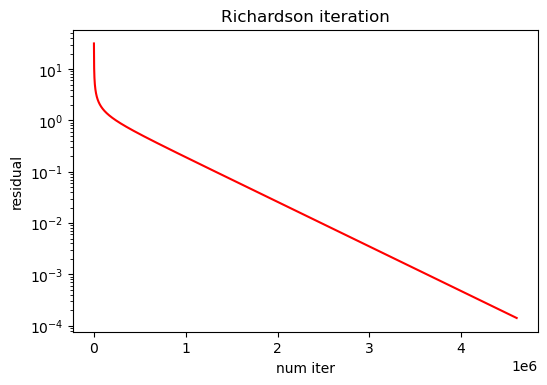

In [22]:
plt.figure(dpi=100)
plt.plot(richardson_res, color='red')
plt.title('Richardson iteration')
plt.xlabel('num iter')
plt.ylabel('residual')
plt.yscale('log')

Chebyshev iter

In [61]:
num_iters = 4096*2
roots = [np.cos((np.pi * (2 * i + 1)) / (2 * num_iters)) for i in range(num_iters)]
taus = [(a.max() + a.min() - (a.min() - a.max()) * r) / 2 for r in roots]
x = np.zeros(A.shape[1])
result = A.dot(x) - np.ones(A.shape[1])
Chebyshev_list = [np.linalg.norm(result)]

In [62]:
num_iters

8192

In [63]:
def leb_shuffle_2n(n):
    if n == 1:
        return np.array([0,], dtype=int)
    else:
        prev = leb_shuffle_2n(n // 2)
        ans = np.zeros(n, dtype=int)
        ans[::2] = prev
        ans[1::2] = n - 1 - prev
        return ans

good_perm_even = leb_shuffle_2n(num_iters)
    
#x = x - 1.0/taus[good_perm_even[i] - 1] * r
#    r = A.dot(x) - rhs
 #   res_cheb.append(np.linalg.norm(r))

In [64]:
good_perm_even

array([   0, 8191, 4095, ..., 6826, 2730, 5461])

In [65]:
for i in range(8192):
    x = x - 1.0/taus[good_perm_even[i] - 1]  * result
    result = A.dot(x) -  np.ones(A.shape[1])
    Chebyshev_list.append(np.linalg.norm(result))

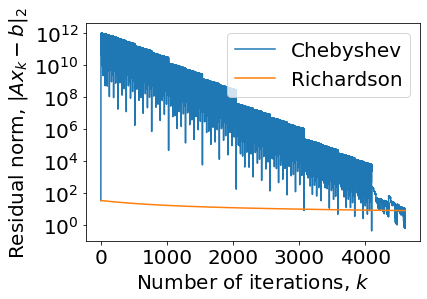

In [70]:

plt.semilogy(Chebyshev_list[:4606], label="Chebyshev")
plt.semilogy(richardson_res[:4606], label="Richardson")
plt.legend(fontsize=20)
plt.xlabel("Number of iterations, $k$", fontsize=20)
plt.ylabel("Residual norm, $\|Ax_k - b\|_2$", fontsize=20)
plt.xticks(fontsize=20)
_ = plt.yticks(fontsize=20)

Conjugate gradient

In [68]:
x = scipy.sparse.linalg.cg(A, np.ones(len(a)), x0=np.zeros(len(a)), maxiter=10)

In [78]:
res_cg = []
for i in range (180):
    
    x = scipy.sparse.linalg.cg(A, np.ones(len(a)), x0=np.zeros(len(a)), maxiter=i)
    result = A.dot(x[0]) - np.ones(A.shape[1])
    res_cg.append(np.linalg.norm(result))

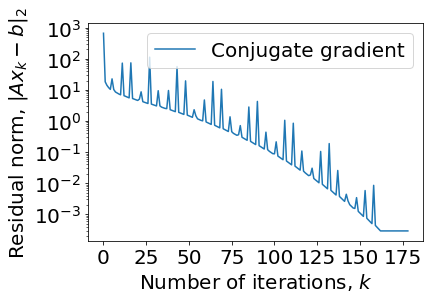

In [79]:

plt.semilogy(res_cg[1:], label="Conjugate gradient")

plt.legend(fontsize=20)
plt.xlabel("Number of iterations, $k$", fontsize=20)
plt.ylabel("Residual norm, $\|Ax_k - b\|_2$", fontsize=20)
plt.xticks(fontsize=20)
_ = plt.yticks(fontsize=20)

## Problem 2 (65 pts)
### On the performance of conjugate gradient method for BTTB matrices.

You are given 2D image (QR-code) and convolution operator $T$. The application of $T$ results in smoothing of the image. In exact arithmetic, the proposed $T$ is non-singular. However, it becomes rather ill-conditioned with increasing $N$ in finite precision arithmetic. In this task you need to study how the conjugate gradient method performs in this case.

The original passcode is given below:

(-0.5, 329.5, 329.5, -0.5)

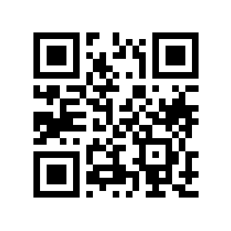

In [3]:
import matplotlib.pyplot as plt
x = plt.imread('qrcode.gif')[:,:,0]
n = x.shape[0]
plt.imshow(x, cmap="gray")
plt.axis("off")

Blurring can be performed by convolving $n\times n$ QR-code with the following filter:

$$T_{i_1j_1,i_2j_2} = T_{i_1-j_1,i_2-j_2} = \frac{\alpha}{\pi}e^{-\alpha[(i_1-i_2)^2 + (j_1-j_2)^2]}, \quad i_1,j_1,i_2,j_2 = 1 \ldots n, \quad 1 > \alpha > 0.$$

You know from lectures that this convolution can be viewed as a matrix-vector multiplication of some BTTB matrix $T$ of size $n^2 \times n^2$.

## Task 1 (15 pts) 

- Write function `T_matvec()` that performs multiplication of $T$ by a given vector $x$ efficiently. Remember about FFT.
- Use `scipy.sparse.linalg.LinearOperator` to create an object that has attribute `.dot()` (this object will be further used in the iterative process). Note that `.dot()` input and output must be 1D vectors, so do not forget to use reshape.

In [4]:
import scipy 
import numpy as np

In [5]:
circulant = np.fft.fft2(scipy.linalg.circulant(1))

In [6]:
scipy.linalg.circulant(1)

array([[1]])

In [7]:
x

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [21]:
n

330

In [18]:
T=np.exp(-0.01*(np.arange(n)**2))
T=np.array([*T,*T[1:][::-1]])
T=np.outer(T, T)

In [19]:
T.shape

(659, 659)

In [8]:
def T_matvec(x, alpha):
    #pass
    x = x.reshape(int(np.sqrt(x.shape[0])),int(np.sqrt(x.shape[0])))
    n = x.shape[0]
    #x_cir = np.zeros((2*n-1,2*n-1))\

    T=np.exp(-alpha*(np.arange(n)**2))
    T=np.array([*T,*T[1:][::-1]])
    T=np.outer(T, T)
    padded_m = np.fft.fft2(np.pad(x, (0,n-1)))
    y = np.real(np.fft.ifft2( np.fft.fft2(T) * padded_m  ))
                
    return y[:n,:n].reshape(-1)
    #return y.reshape(-1)


# T = spla.LinearOperator((n**2, n**2), matvec = lambda x : T_matvec(x, alpha))
# your code is here

In [9]:
from scipy.sparse import linalg
alpha = 1
LA = linalg.LinearOperator((n**2,n**2), matvec = lambda x : T_matvec(x, alpha))

In [10]:
LA

<108900x108900 _CustomLinearOperator with dtype=float64>

**Remark.** The obtained matrix $T$ is positive definite (at least in the exact arithmetic), hence the conjugate gradient method can be applied to solve with $T$.

**Bonus question: Prove the remark above.**

## Task 2 (10 pts) 
- For $\alpha \in \{ 0.1, 0.01,0.001\}$ compute $y=Tx$ and deconvolve $x$ using `scipy.sparse.linalg.cg` with $tol \in \{10^{-3}, 10^{-4}, 10^{-5}, 10^{-6}, 10^{-7}\}$. For each pair $\alpha$, $tol$ write out `num_iters` and relative error $e = \frac{\|x - x^*\|_2}{\|x\|_2}$ .
- Comment on the results: 

    1) why the relative error does not converge to zero? 
    
    2) why the relative error converges to different values for different $\alpha$?

In [11]:
alpha_range = [.1, .01, .001]
tolerance_range = [1e-3,1e-4,1e-5,1e-6,1e-7]
def solve_sparse(A, b,tol):
        num_iters = 0
        def callback(xk):
            nonlocal num_iters
            num_iters+=1

        x,status=scipy.sparse.linalg.cg(A, b,tol=tol, callback=callback,maxiter=1000)
        return x,status,num_iters


#linalg.cg(A, b,tol=tol, callback=callback, maxiter = maxiter)

In [12]:
norm_list = []
status_list = []
iter_list = []
for a in alpha_range:
    y = T_matvec(x.reshape(-1),a)
    LA = linalg.LinearOperator((n**2,n**2), matvec = lambda x : T_matvec(x, a))
    for t in tolerance_range:
        x1,_,status = solve_sparse(LA, y,t)
        norm = np.linalg.norm(x1-x.reshape(-1))/np.linalg.norm(x.reshape(-1))
        norm_list.append(norm)
        status_list.append(status)
        iter_list.append(num_iters)

NameError: name 'num_iters' is not defined

In [195]:
iter_list

[1, 1, 1, 1, 1, 1, 1, 1]

In [156]:
iter_list

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [137]:
plt.plot(result[0])
plt.semilogy(richardson_res[:4606])
plt.legend(fontsize=20)
plt.xlabel("Number of iterations, $k$", fontsize=20)
plt.ylabel("Residual norm, $\|Ax_k - b\|_2$", fontsize=20)
plt.xticks(fontsize=20)

[[array([255., 255., 255., ..., 255., 255., 255.]),
  0,
  4.91039813570624e-15,
  1],
 [array([255., 255., 255., ..., 255., 255., 255.]),
  0,
  4.91039813570624e-15,
  1],
 [array([255., 255., 255., ..., 255., 255., 255.]),
  0,
  4.91039813570624e-15,
  1],
 [array([255., 255., 255., ..., 255., 255., 255.]),
  0,
  4.91039813570624e-15,
  1],
 [array([255., 255., 255., ..., 255., 255., 255.]),
  0,
  4.91039813570624e-15,
  1],
 [array([255., 255., 255., ..., 255., 255., 255.]),
  0,
  3.327701178407768e-14,
  1],
 [array([255., 255., 255., ..., 255., 255., 255.]),
  0,
  3.327701178407768e-14,
  1],
 [array([255., 255., 255., ..., 255., 255., 255.]),
  0,
  3.327701178407768e-14,
  1],
 [array([255., 255., 255., ..., 255., 255., 255.]),
  0,
  3.327701178407768e-14,
  1],
 [array([255., 255., 255., ..., 255., 255., 255.]),
  0,
  3.327701178407768e-14,
  1],
 [array([255., 255., 255., ..., 255., 255., 255.]),
  0,
  2.715300788933469e-14,
  1],
 [array([255., 255., 255., ..., 255.,

In [ ]:
# your code is here

In all further tasks fix $\alpha = 0.01$. Compute $y = Tx$, and add vector with Gaussian noise from $\mathcal{N}(0, 1)$ to $y$ and get the final right-hand side $\hat{y}$.

## Task 3 (10 pts)
- Try to deconvolve $\hat{y}$ with matrix $T$ using $tol=10^{-5}$ in CG. Explain, why CG does not converge.
- Suggest how CG can still be used to recover $x$. What are drawbacks of the suggested approach?

In [13]:
def solve_sparse(A, b,tol,iterations):
        num_iters = 0
        def callback(xk):
            nonlocal num_iters
            num_iters+=1

        x,status=scipy.sparse.linalg.cg(A, b,tol=tol, callback=callback,maxiter=iterations)
        return x,status,num_iters


In [14]:
from scipy.sparse import linalg
alpha = .01
LA = linalg.LinearOperator((n**2,n**2), matvec = lambda x : T_matvec(x, alpha))
y = T_matvec(x.reshape(-1),alpha)
yhat = y+np.random.standard_normal(y.shape)


In [16]:
x2,_,status1 = solve_sparse(LA, y, 10**-5, 1000)
x2,_,status1

(array([253.18966154, 254.92765024, 256.03771716, ..., 256.91232101,
        258.56768521, 259.97978075]),
 0,
 268)

In [17]:
x3,_,status3 = solve_sparse(LA, yhat, 10**-5, 1000)
status3

1000

The main idea why conjigate gradient method doesn't converge in case of yhat because we have ill-conditioned key. We changed input values and our system became ill-conditioned. That's obvious

In [ ]:
# your code is here

## Task 4 (10 pts)

- Implement Tikhonov regularization, i.e. deconvolve $\hat{y}$ with the perturbed matrix $T_{\lambda} = T + \lambda^2I$ instead of $T$. Modify `T_matvec()` according to the template below.
- Perform computations for all $\lambda \in \{10, 1, 0.1\}$ and $tol \in \{10^{-3}, 10^{-4}, 10^{-5},10^{-6}, 10^{-7} \}$. For each pair $(\lambda, tol)$ write out `num_iters` and relative error $e = \frac{\|x - x^*\|_2}{\|x\|_2}$. Comment on the results: 
    - Compare robustness of the convergence with task 2. What the observed results indicate?

In [ ]:
def T_matvec(x, alpha):
    #pass
    x = x.reshape(int(np.sqrt(x.shape[0])),int(np.sqrt(x.shape[0])))
    n = x.shape[0]
    #x_cir = np.zeros((2*n-1,2*n-1))\

    T=np.exp(-alpha*(np.arange(n)**2))
    T=np.array([*T,*T[1:][::-1]])
    T=np.outer(T, T)
    T[0,0] += lmbda**2
    padded_m = np.fft.fft2(np.pad(x, (0,n-1)))
    y = np.real(np.fft.ifft2( np.fft.fft2(T) * padded_m  ))
                
    return y[:n,:n].reshape(-1)

In [ ]:
def T_lmbda_matvec(x, aplha, lmbda):
    pass

# your code is here

## Task 5 (20 pts)

- Implement BCCB preconditioner for $T_{\lambda}$ based on Strang preconditioner for Toeplitz matrix (hint: build circulants using first columns of Toeplitz matrices on both levels). You know from lectures that circulants can be explicitly inverted using convolution theorem. Implement the corresponding matvec according to the template provided below.
- Check speedup in iterations and runtime that can be gained from the preconditioning for $\alpha = 0.01$, $\lambda = 1$ compared with Task 4. Explain results.

In [ ]:
def C_inv_matvec(x, alpha, lmbda):
    pass

# your code is here